The model describes how a population $N$ changes over time $t$ when resources are finite. Primary Differential Equation:
$$\frac{dN}{dt} = \beta(C_0 - \alpha N)N$$

| **Symbol** | **Biological Meaning**      | **Physical Units**         | **The "Why"**                                                           |
| ---------- | --------------------------- | -------------------------- | ----------------------------------------------------------------------- |
| $N(t)$     | Population size at time $t$ | Individuals/Number         | The state variable we are tracking.                                     |
| $C_0$      | Initial food concentration  | [Mass/Volume]              | Sets the "starting fuel" for the population.                            |
| $\alpha$   | Consumption rate            | [Food/Individual]          | Converts population count into food "cost".                             |
| $\beta$    | Growth efficiency           | $[(Food \cdot Time)^{-1}]$ | Relates food availability to the actual birth/death rate.               |
| $B$        | Carrying Capacity           | Individuals/Number         | The maximum population the environment can sustain ($B = C_0/\alpha$).  |
| $r$        | Intrinsic growth rate       | $[Time^{-1}]$              | The speed of growth when resources are at their peak ($r = \beta C_0$). |
- **Limited Resources:** Unlike the initial model where resources were virtually unlimited , here growth depends on food concentration $c$.
- **Linear Consumption:** Food decreases linearly as the population grows: $c = C_0 - \alpha N$.
- **Immediate Feedback:** The population feels the "pressure" of diminishing food instantaneously, with no time lags.
- **Closed System:** No immigration or emigration; changes are strictly due to the balance of births and deaths influenced by food availability.

We use **Separation of Variables** because the rate of change $\frac{dN}{dt}$ is a function of the state variable $N$ itself. We move all $N$ terms to the left and $t$ terms to the right:
$$\frac{1}{(C_0 - \alpha N)N} dN = \beta dt$$
To integrate the left side, we must break the fraction into simpler parts. We seek constants $A$ and $D$ such that:
$$\frac{1}{N(C_0 - \alpha N)} = \frac{A}{N} + \frac{D}{C_0 - \alpha N}$$
Multiplying through by $N(C_0 - \alpha N)$ gives $1 = A(C_0 - \alpha N) + DN$.

- If $N = 0$, then $1 = A(C_0) \Rightarrow A = 1/C_0$.
- If $N = C_0/\alpha$, then $1 = D(C_0/\alpha) \Rightarrow D = \alpha/C_0$.

Substituting these back into our integral:
$$\int \left( \frac{1}{C_0 N} + \frac{\alpha}{C_0(C_0 - \alpha N)} \right) dN = \int \beta dt$$
Factor out $1/C_0$ and integrate:
$$\frac{1}{C_0} \left[ \ln|N| - \ln|C_0 - \alpha N| \right] = \beta t + C$$
Using log properties ($\ln a - \ln b = \ln(a/b)$) and multiplying by $C_0$:
$$\ln\left| \frac{N}{C_0 - \alpha N} \right| = \beta C_0 t + C_0 C$$
Exponentiate both sides:
$$\frac{N}{C_0 - \alpha N} = e^{\beta C_0 t} \cdot e^{C_0 C}$$
Let $A'$ be the constant $e^{C_0 C}$. At $t=0$, $N=N_0$:
$$A' = \frac{N_0}{C_0 - \alpha N_0}$$
Now, rearrange the equation to isolate $N$:
$$N = (C_0 - \alpha N) A' e^{\beta C_0 t}$$
$$N + \alpha N A' e^{\beta C_0 t} = C_0 A' e^{\beta C_0 t}$$
$$N(1 + \alpha A' e^{\beta C_0 t}) = C_0 A' e^{\beta C_0 t}$$
Substitute $A'$ back in and simplify using the definitions $B = C_0/\alpha$ and $r = \beta C_0$. After algebraic reduction, we arrive at the provided analytical solution:
$$N(t) = \frac{N_0 B}{N_0 + (B - N_0)\exp(-rt)}$$
- **The S-Curve:** The population doesn't explode forever like the exponential model. It starts slow, accelerates, and then levels off as it approaches $B$.
- **Scarcity Pressure:** The term $(C_0 - \alpha N)$ acts as a "braking mechanism". As $N$ gets larger, the term $(C_0 - \alpha N)$ gets smaller, eventually hitting zero and stopping growth entirely.

We analyze the steady states where $\dot{N} = 0$.

**Steady State 1: Extinction ($N = 0$)** If $N_0 = 0$, then $\dot{N} = \beta(C_0 - \alpha(0))(0) = 0$.
- **Stability:** This is an **unstable** equilibrium. If you add even one bacterium ($N > 0$), the population will grow away from zero.
**Steady State 2: Carrying Capacity ($N = B$)** If $N = C_0/\alpha$, then $\dot{N} = \beta(C_0 - \alpha(C_0/\alpha))N = \beta(0)N = 0$.
- **Stability:** This is a **stable** equilibrium (Sink).
- **Proof by Limit:** As $t \rightarrow \infty$, the term $e^{-rt}$ in the denominator goes to $0$. $$\lim_{t \to \infty} \frac{N_0 B}{N_0 + (B - N_0)e^{-rt}} = \frac{N_0 B}{N_0 + 0} = B$$Regardless of the starting population (as long as $N_0 > 0$), the system "gravity" pulls the population toward $B$.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
C0 = 10      # Initial food concentration 
alpha = 0.1  # Consumption per bacterium
beta = 0.05  # Growth efficiency 
N0 = 1       # Initial population

B = C0 / alpha       # Carrying Capacity (e.g., 100) 
r = beta * C0        # Intrinsic Growth Rate (e.g., 0.5) 

t = np.linspace(0, 20, 200)

def analytical_solution(t, N0, B, r):
    return (N0 * B) / (N0 + (B - N0) * np.exp(-r * t))

N_values = analytical_solution(t, N0, B, r)

t_grid = np.linspace(0, 20, 20)
N_grid = np.linspace(0, 120, 20)
T, N = np.meshgrid(t_grid, N_grid)

dN = beta * (C0 - alpha * N) * N
dT = np.ones(dN.shape) 

L = np.sqrt(dT**2 + dN**2)
dT, dN = dT/L, dN/L

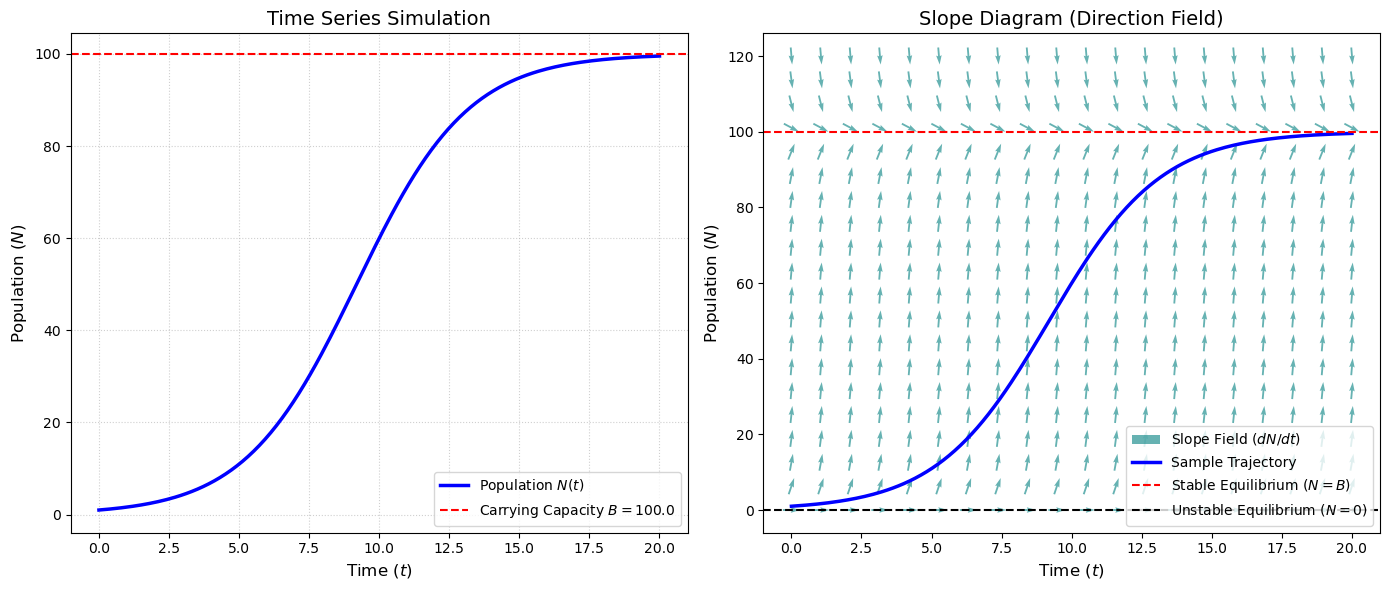

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.plot(t, N_values, 'b-', linewidth=2.5, label='Population $N(t)$')
ax1.axhline(B, color='r', linestyle='--', label=f'Carrying Capacity $B={B}$')
ax1.set_title('Time Series Simulation', fontsize=14)
ax1.set_xlabel('Time ($t$)', fontsize=12)
ax1.set_ylabel('Population ($N$)', fontsize=12)
ax1.grid(True, linestyle=':', alpha=0.6)
ax1.legend()

ax2.quiver(T, N, dT, dN, color='teal', alpha=0.6, pivot='mid', label='Slope Field ($dN/dt$)')
ax2.plot(t, N_values, 'b-', linewidth=2.5, label='Sample Trajectory')
ax2.axhline(B, color='r', linestyle='--', label='Stable Equilibrium ($N=B$)')
ax2.axhline(0, color='k', linestyle='--', label='Unstable Equilibrium ($N=0$)')
ax2.set_title('Slope Diagram (Direction Field)', fontsize=14)
ax2.set_xlabel('Time ($t$)', fontsize=12)
ax2.set_ylabel('Population ($N$)', fontsize=12)
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()